In [12]:
import os

PASCAL_PATH = '../../database/PASCAL_format_train300'

PASCAL_PATH = r'C:\Users\langh\Dropbox (local)\Ene2019\MCC-I Masters\Thesis\1. Dataset\1. Satellite\Dataset\World\PASCAL_format'

image_root_path = os.path.join(PASCAL_PATH,r"JPEGImages")
mask_root_path = os.path.join(PASCAL_PATH,r"SegmentationClass")

def GetLista():
    global image_root_path
    lista = [f.replace(".jpg","") for f in os.listdir(image_root_path) if f.endswith(".jpg")]
    return lista

In [2]:
import os
def GetSize(l):
    size=float(os.path.getsize(os.path.join(image_root_path,'{}.jpg'.format(l))))/1000
    return size

In [3]:
import cv2
def GetWidth(l):
    filename=os.path.join(image_root_path,'{}.jpg'.format(l))
    img = cv2.imread(filename)
    height, width, channels = img.shape
    return float(width)

In [4]:
import cv2
def GetHeight(l):
    filename=os.path.join(image_root_path,'{}.jpg'.format(l))
    img = cv2.imread(filename)
    height, width, channels = img.shape
    return float(height)

In [5]:
def GetTotalArea(l):
    filename=os.path.join(mask_root_path,'{}.png'.format(l))
    img = cv2.imread(filename)
    height, width, channels = img.shape
    return float(height*width)
def GetArea(l):
    filename=os.path.join(mask_root_path,'{}.png'.format(l))
    img = cv2.imread(filename,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    area=0
    for cnt in contours:
        area = area+cv2.contourArea(cnt)
    return area

In [6]:
def GetAreaCount(l):
    filename=os.path.join(mask_root_path,'{}.png'.format(l))
    img = cv2.imread(filename,1)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,thresh = cv2.threshold(img, 100, 255, cv2.THRESH_BINARY)
    im2,contours,hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    area=0
    for cnt in contours:
        area = area+1
    return area

In [13]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display, Markdown, Latex

columns=['file', 'size', 'width', 'height', 'total_area', 'area','area_count']

df = pd.DataFrame(columns=columns)
lista=GetLista()
for i,l in enumerate(lista):
    df.loc[i]=[l, GetSize(l), GetWidth(l),  GetHeight(l), GetTotalArea(l), GetArea(l), GetAreaCount(l)]

## size

              size
count   491.000000
mean    119.368857
std     142.402398
min       6.094000
25%      34.559500
50%      64.885000
75%     150.387000
max    1167.305000


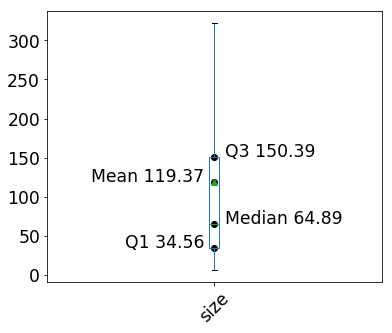

## width,height

             width       height
count   491.000000   491.000000
mean    703.407332   746.804481
std     431.746648   470.822587
min     127.000000   130.000000
25%     412.500000   410.000000
50%     591.000000   633.000000
75%     888.500000   964.500000
max    3170.000000  3163.000000


<Figure size 432x288 with 0 Axes>

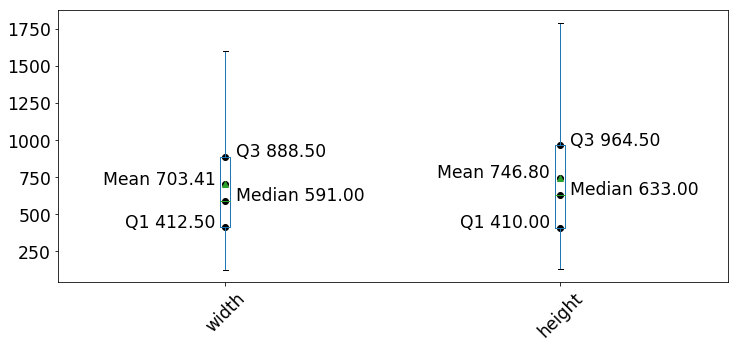

## total_area,area

         total_area          area
count  4.910000e+02  4.910000e+02
mean   6.385713e+05  1.684677e+05
std    7.534838e+05  2.123350e+05
min    2.561000e+04  0.000000e+00
25%    1.768770e+05  4.374850e+04
50%    3.507760e+05  9.558350e+04
75%    8.315430e+05  2.064102e+05
max    5.329092e+06  1.913106e+06


<Figure size 432x288 with 0 Axes>

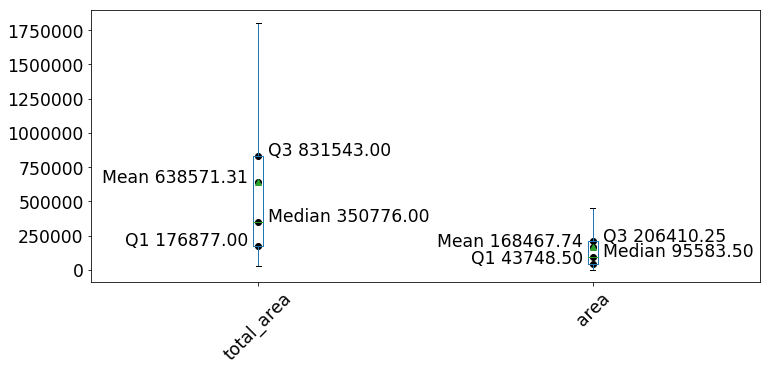

## area_count

        area_count
count          491
unique          61
top              4
freq            52


<Figure size 432x288 with 0 Axes>

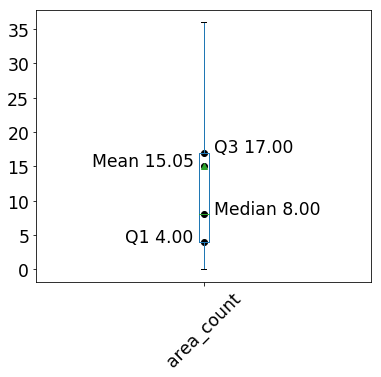

<Figure size 432x288 with 0 Axes>

In [42]:
def ShowBoxplot(show_columns):
    display(Markdown('## {}'.format(','.join(show_columns))))
    df2=df[show_columns]
    print(df2.describe())
    fig, ax = plt.subplots(1,1)
    df2.plot.box(ax=ax, return_type='axes', figsize=(6*len(show_columns),5), showfliers=False,showmeans=True,fontsize="xx-large", widths=0.03)
    #df2.boxplot(ax=ax, figsize=(16, 12), showfliers=False,showmeans=True)
    for col,column in enumerate(show_columns):
        col=col+1
        q1 = df2[column].quantile(0.25)
        mean = df2[column].mean()
        median = df2[column].median()
        q3 = df2[column].quantile(0.75)
        ax.scatter(col, q1, c='k', label='Q1')
        ax.text(col-.03, q1, "Q1 {0:.2f}".format(q1),fontsize="xx-large", horizontalalignment='right')
        ax.scatter(col, q3, c='k', label='Q3')
        ax.text(col+.03, q3, "Q3 {0:.2f}".format(q3),fontsize="xx-large")
        ax.scatter(col, mean, c='k', label='Mean')
        ax.text(col-.03, mean, "Mean {0:.2f}".format(mean),fontsize="xx-large", horizontalalignment='right')
        ax.scatter(col, median, c='k', label='Median')
        ax.text(col+.03, median, "Median {0:.2f}".format(median),fontsize="xx-large")
    plt.xticks(rotation=45)
    plt.show()
    plt.show()
    plt.gcf().clear()
    fig.savefig('{}-{}.eps'.format(','.join(show_columns),"stats"), format="eps",bbox_inches='tight')

ShowBoxplot(['size'])
ShowBoxplot(['width','height'])
ShowBoxplot(['total_area','area'])
ShowBoxplot(['area_count'])

In [11]:
df.to_csv('image_features.csv', index=False)

In [14]:
df.sort_values('area_count', ascending=False).head()

,file,size,width,height,total_area,area,area_count
103,187779925,272.961,1104.0,1140.0,1258560.0,462401.0,332
9,119422707,3521.819,4454.0,4415.0,19664410.0,6578548.5,184
446,518398476,449.095,1768.0,1446.0,2556528.0,776765.0,164
87,182887284,189.713,1010.0,1292.0,1304920.0,345953.0,162
256,313626777,149.375,959.0,1196.0,1146964.0,166477.5,156
